In [ ]:
file_path = './utk_face_cropped_Sample_01.csv' # ..._Sample_01.csv to ..._Sample_10.csv

# Top Left: images_sub_reshape[:,:,0:20,0:20] = 0
# Eyes: images_sub_reshape[:,:,30:100,20:200] = 0
# Mouth: images_sub_reshape[:,:,130:210,20:200] = 0
# Nose: images_sub_reshape[:,:,100:140,85:140] = 0
# Face: images_sub_reshape[:,:,:200,:] = 0

hight_1, hight_2, width_1, width_2 = 130, 210, 20, 200 # For Mouth

In [ ]:
# From https://www.kaggle.com/datasets/abhikjha/utk-face-cropped/data
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhikjha/utk-face-cropped")

print("Path to dataset files:", path)

import os
from PIL import Image
import numpy as np
import cv2

def get_train_test_df(df):
    train_df = df.loc[df['Type'] == 'Train']
    images_path = '/root/.cache/kagglehub/datasets/abhikjha/utk-face-cropped/versions/1/utkcropped'

    # Initialize lists to store images and ages
    images_train = []
    ages_train = []

    for i in range(len(train_df)):
        file_name = train_df.iloc[i]['File']
        age = train_df.iloc[i]['Age']
        # Construct the image path
        image_path = os.path.join(images_path, file_name)

        # Load the image
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)  # Convert PIL Image to NumPy array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.stack((image,)*3, axis=-1)
        images_train.append(image)
        ages_train.append(age)

    # Resize all images to a common size (e.g., 224x224 pixels)
    common_size = (224, 224)
    resized_images_train = [cv2.resize(image, common_size) for image in images_train]

    # Convert the resized images list into a numpy array
    images_train_array = np.array(resized_images_train)
    ages_train_array = np.array(ages_train)

    # Print the shape of the resulting numpy array
    print(f"Shape of the images train array: {images_train_array.shape}")
    print(f"Shape of the ages train array: {ages_train_array.shape}")

    test_df = df.loc[df['Type'] == 'Test']
    # Initialize lists to store images and ages
    images_test = []
    ages_test = []

    for i in range(len(test_df)):
        file_name = test_df.iloc[i]['File']
        age = test_df.iloc[i]['Age']
        # Construct the image path
        image_path = os.path.join(images_path, file_name)

        # Load the image
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)  # Convert PIL Image to NumPy array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.stack((image,)*3, axis=-1)
        images_test.append(image)
        ages_test.append(age)

    # Resize all images to a common size (e.g., 224x224 pixels)
    resized_images_test = [cv2.resize(image, common_size) for image in images_test]

    # Convert the resized images list into a numpy array
    images_test_array = np.array(resized_images_test)
    ages_test_array = np.array(ages_test)

    # Print the shape of the resulting numpy array
    print(f"Shape of the images test array: {images_test_array.shape}")
    print(f"Shape of the ages test array: {ages_test_array.shape}")

    return images_train_array, ages_train_array, images_test_array, ages_test_array




   Age                                   File   Type
0   20  20_0_0_20170117135525494.jpg.chip.jpg  Train
1   20  20_1_0_20170104021334149.jpg.chip.jpg  Train
2   20  20_1_4_20170103224557431.jpg.chip.jpg  Train
3   20  20_0_3_20170104214317461.jpg.chip.jpg  Train
4   20  20_0_0_20170113133053319.jpg.chip.jpg  Train


100%|██████████| 232M/232M [00:11<00:00, 21.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhikjha/utk-face-cropped/versions/1


Shape of the images train array: (1000, 224, 224, 3)
Shape of the ages train array: (1000,)
Shape of the images test array: (1000, 224, 224, 3)
Shape of the ages test array: (1000,)
Shape of the images array: (2000, 3, 224, 224)
Shape of the ages array: (2000,)


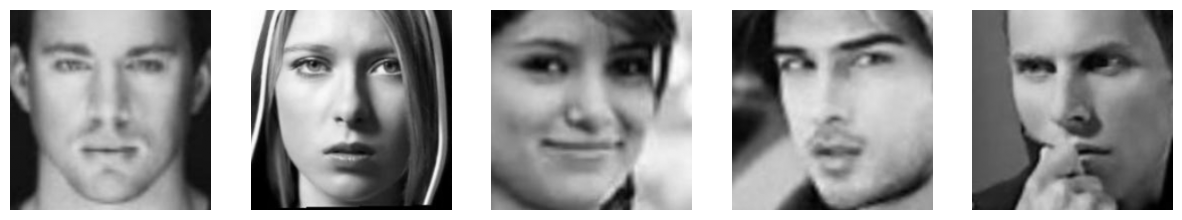

In [ ]:
images_train_array, ages_train_array, images_test_array, ages_test_array = get_train_test_df(df)

ages_all_array = np.concatenate((ages_train_array, ages_test_array), axis=0)
images_all_array = np.concatenate((images_train_array, images_test_array), axis=0)/ 255

images_all_array = np.transpose(np.transpose(images_all_array, (0, 3, 2, 1)), (0, 1, 3, 2))

# Print the shape of the resulting numpy array
print(f"Shape of the images array: {images_all_array.shape}")
print(f"Shape of the ages array: {ages_all_array.shape}")

# images_train_array, images_test_array = images_train_array / 255, images_test_array / 255

# images_train_array = np.transpose(np.transpose(images_train_array, (0, 3, 2, 1)), (0, 1, 3, 2))
# images_test_array = np.transpose(np.transpose(images_test_array, (0, 3, 2, 1)), (0, 1, 3, 2))
# print(f"Shape of the images_sub_reshape array: {images_train_array.shape}")
# print(f"Shape of the images_test_array array: {images_test_array.shape}")

# images_train_array[:,:,hight_1:hight_2,width_1:width_2] = 0
# images_test_array[:,:,hight_1:hight_2,width_1:width_2] = 0

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'image_array' is your NumPy array with shape (3, 224, 224)
# Create a figure with 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    # Transpose the array to (224, 224, 3) for displaying
    image = np.transpose(images_all_array[i], (1, 2, 0))
    ax.imshow(image)
    ax.axis('off')  # Hide the axis

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from glob import glob

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision.models as models
import torch.optim as optim
from torchvision.models import ResNet18_Weights

import math
import random

from scipy.stats import chi2
from scipy.stats import norm

from PIL import Image

def p_val_test1(input_value):
    output = 1 - chi2.cdf(input_value, df=1)
    return output

In [ ]:
#early stopping
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=20, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 20
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            #self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True

def test1(x, z, y, c):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    n = 2000
    n1 = math.ceil(c * n)
    EPOCH = 200
    BATCH_SIZE = 25
    LR = 0.0001

    # net1 = models.resnet18(weights=ResNet18_Weights.DEFAULT).to(device)
    # # for param in net1.parameters():
    # #     param.requires_grad = False
    # num_ftrs = net1.fc.in_features
    # fc_layers = nn.Sequential(
    #     nn.Linear(num_ftrs, 64),
    #     nn.ReLU(),
    #     nn.Linear(64, 32),
    #     nn.ReLU(),
    #     nn.Linear(32, 1)
    # ).to(device)

    # net1.fc = fc_layers

    # for param in net1.fc.parameters():
    #     param.requires_grad = True

    # Load pre-trained EfficientNet B0 model using the 'weights' parameter
    net1 = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
    # Modify the final layer to output a single value

    num_ftrs = net1.classifier[1].in_features
    net1.classifier[1] = nn.Linear(num_ftrs, 1)
    # Move the model to the device after modifying the final layer
    net1.to(device)

    loss_func = nn.L1Loss().to(device)
    optimizer = optim.Adam(net1.parameters(), lr=LR, weight_decay=1e-8)
    early_stopping = EarlyStopping(patience=5, verbose=False)
    train_result = np.zeros(EPOCH)
    test_result = np.zeros(EPOCH)

    index = np.random.choice(a=n, size=n1, replace=False)
    x_train = x[index, :, :, :].to(device)
    x_test = torch.tensor(np.delete(x.detach().cpu().numpy(), index, axis=0)).to(device)
    z_train = z[index, :, :, :].to(device)
    z_test = torch.tensor(np.delete(z.detach().cpu().numpy(), index, axis=0)).to(device)
    y_train = y[index, :].to(device)
    y_test = torch.tensor(np.delete(y.detach().cpu().numpy(), index, axis=0)).to(device)
    train_data = Data.TensorDataset(z_train, y_train)
    train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_data = Data.TensorDataset(z_test, y_test)
    test_loader = Data.DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

    for epoch in range(EPOCH):
        net1.train()
        for step, (b_x, b_y) in enumerate(train_loader):
            b_x, b_y = b_x.to(device), b_y.to(device)
            prediction = net1(b_x)
            loss = loss_func(prediction, b_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        net1.eval()
        train_result_temp = 0
        batch_num = 0
        with torch.no_grad():
            for step, (b_x, b_y) in enumerate(train_loader):
                b_x, b_y = b_x.to(device), b_y.to(device)
                prediction = net1(b_x)
                train_result_temp += loss_func(prediction, b_y).item()
                batch_num += 1
        train_result[epoch] = train_result_temp / batch_num
        test_result_temp = 0
        batch_num = 0
        with torch.no_grad():
            for step, (b_x, b_y) in enumerate(test_loader):
                b_x, b_y = b_x.to(device), b_y.to(device)
                prediction = net1(b_x)
                test_result_temp += loss_func(prediction, b_y).item()
                batch_num += 1
        valid_loss = test_result_temp / batch_num
        test_result[epoch] = valid_loss
        if (epoch + 1) % 5 == 0:
            print('Epoch: ', epoch + 1, '| train loss: %.4f' % loss.item(), '| valid loss: %.4f' % valid_loss)
        early_stopping(valid_loss, net1)
        if early_stopping.early_stop:
            break
    net1.load_state_dict(torch.load('checkpoint.pt', weights_only=False))

    del train_loader, test_loader

    net1.eval()
    train_data = Data.TensorDataset(z_train, y_train)
    train_loader = Data.DataLoader(dataset=train_data, batch_size=1, shuffle=False)
    test_data = Data.TensorDataset(z_test, y_test)
    test_loader = Data.DataLoader(dataset=test_data, batch_size=1, shuffle=False)
    h_train = torch.zeros_like(y_train)
    h_test = torch.zeros_like(y_test)
    with torch.no_grad():
        for step, (b_x, b_y) in enumerate(train_loader):
            b_x, b_y = b_x.to(device), b_y.to(device)
            prediction = net1(b_x)
            h_train[step, :] = prediction

    # h_train = net1(z_train)
    y_tilde_train = torch.tensor(y_train.detach().cpu().numpy() - h_train.detach().cpu().numpy()).to(device)
    # h_test = net1(z_test)
    with torch.no_grad():
        for step, (b_x, b_y) in enumerate(test_loader):
            b_x, b_y = b_x.to(device), b_y.to(device)
            prediction = net1(b_x)
            h_test[step, :] = prediction

    y_tilde_test = torch.tensor(y_test.detach().cpu().numpy() - h_test.detach().cpu().numpy()).to(device)

    del train_loader, test_loader

    # net2 = models.resnet18(weights=ResNet18_Weights.DEFAULT).to(device)
    # # for param in net2.parameters():
    # #     param.requires_grad = False
    # fc_layers_2 = nn.Sequential(
    #     nn.Linear(num_ftrs, 64),
    #     nn.ReLU(),
    #     nn.Linear(64, 32),
    #     nn.ReLU(),
    #     nn.Linear(32, 1)
    # ).to(device)
    # net2.fc = fc_layers_2
    # for param in net2.fc.parameters():
    #     param.requires_grad = True

    net2 = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
    num_ftrs = net2.classifier[1].in_features
    net2.classifier[1] = nn.Linear(num_ftrs, 1)
    net2.to(device)

    optimizer = optim.Adam(net2.parameters(), lr=LR, weight_decay=1e-8)
    early_stopping = EarlyStopping(patience=5, verbose=False)
    train_result = np.zeros(EPOCH)
    test_result = np.zeros(EPOCH)

    train_data = Data.TensorDataset(x_train, y_tilde_train)
    train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_data = Data.TensorDataset(x_test, y_tilde_test)
    test_loader = Data.DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

    for epoch in range(EPOCH):
        net2.train()
        for step, (b_x, b_y) in enumerate(train_loader):
            b_x, b_y = b_x.to(device), b_y.to(device)
            prediction = net2(b_x)
            loss = loss_func(prediction, b_y)
            optimizer.zero_grad()
            loss.backward(retain_graph=True)
            optimizer.step()

        net2.eval()
        train_result_temp = 0
        batch_num = 0
        with torch.no_grad():
            for step, (b_x, b_y) in enumerate(train_loader):
                b_x, b_y = b_x.to(device), b_y.to(device)
                prediction = net2(b_x)
                train_result_temp += loss_func(prediction, b_y).item()
                batch_num += 1
        train_result[epoch] = train_result_temp / batch_num
        valid_loss = 0
        batch_num = 0
        with torch.no_grad():
            for step, (b_x, b_y) in enumerate(test_loader):
                b_x, b_y = b_x.to(device), b_y.to(device)
                prediction = net2(b_x)
                valid_loss += loss_func(prediction, b_y).item()
                batch_num += 1
        valid_loss = valid_loss / batch_num
        test_result[epoch] = valid_loss
        if (epoch + 1) % 5 == 0:
            print('Epoch: ', epoch + 1, '| train loss: %.4f' % loss.item(), '| valid loss: %.4f' % valid_loss)
        early_stopping(valid_loss, net2)
        if early_stopping.early_stop:
            break

    net2.load_state_dict(torch.load('checkpoint.pt', weights_only=False))

    del train_loader, test_loader

    test_data = Data.TensorDataset(x_test, y_tilde_test)
    test_loader = Data.DataLoader(dataset=test_data, batch_size=1, shuffle=False)

    f_hat = torch.zeros_like(y_tilde_test)
    net2.eval()
    with torch.no_grad():
        for step, (b_x, b_y) in enumerate(test_loader):
            b_x, b_y = b_x.to(device), b_y.to(device)
            prediction = net2(b_x)
            f_hat[step, :] = prediction

    f_hat = f_hat.detach().cpu().numpy()
    Tn = np.sum((f_hat - np.mean(y_tilde_test.detach().cpu().numpy())) ** 2) / np.var(y_tilde_test.detach().cpu().numpy())
    Tn1 = Tn + np.sum(f_hat ** 2)
    return [Tn, Tn1]

def Cauchy_test1(x,z,y,c=0.9,B=5):
    pv = np.zeros([2,B])
    Tx = np.zeros([2,B])
    for b in range(B):
        test_stats = test1(x,z,y,c)
        pv[0,b] = 1 - chi2.cdf(test_stats[0],df=1)
        Tx[0,b] = np.tan((1/2-pv[0,b])*np.pi)
        pv[1,b] = 1 - chi2.cdf(test_stats[1],df=1)
        Tx[1,b] = np.tan((1/2-pv[1,b])*np.pi)
    Tmean=np.mean(Tx,1)
    Q = 1/2- np.arctan(Tmean)/np.pi
    return(Q)




# test1: pMIT_DNN; pMITe_DNN;
# Cauchy_test1: pMITM_DNN; pMITeM_DNN
#Eyes
#Define X,Z,Y
x = torch.tensor(images_all_array, dtype=torch.float32) # torch.zeros(N,3,224,224)
y = torch.tensor(ages_all_array, dtype=torch.float32) # torch.zeros(N,1)

# min_y, _ = torch.min(y, dim=0)
# max_y, _ = torch.max(y, dim=0)

# y = (y-min_y)/(max_y-min_y)
y = y.reshape(-1, 1)

z = x.clone()
z[:,:,hight_1:hight_2,width_1:width_2] = 0


print("--- case: Eyes ---")
setup_seed(123)
stat_temp1 = test1(x,z,y,0.9)
print("pval for pMIT, pMITe: ", p_val_test1(stat_temp1))
setup_seed(123)
stat_temp2 = Cauchy_test1(x,z,y)
print("pval for pMITM, pMITeM: ", stat_temp2)

--- case: Eyes ---


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 219MB/s]


Epoch:  5 | train loss: 14.9817 | valid loss: 12.6453
Epoch:  10 | train loss: 5.0071 | valid loss: 6.1590
Epoch:  15 | train loss: 3.0252 | valid loss: 5.9384
Epoch:  20 | train loss: 3.1124 | valid loss: 5.9055
Epoch:  5 | train loss: 0.9562 | valid loss: 5.7616
Epoch:  10 | train loss: 0.6685 | valid loss: 5.7692
Epoch:  15 | train loss: 0.3524 | valid loss: 5.7921
pval for pMIT, pMITe:  [0.00664741 0.        ]
Epoch:  5 | train loss: 14.9817 | valid loss: 12.6453
Epoch:  10 | train loss: 5.0071 | valid loss: 6.1590
Epoch:  15 | train loss: 3.0252 | valid loss: 5.9384
Epoch:  20 | train loss: 3.1124 | valid loss: 5.9055
Epoch:  5 | train loss: 0.9562 | valid loss: 5.7616
Epoch:  10 | train loss: 0.6685 | valid loss: 5.7692
Epoch:  15 | train loss: 0.3524 | valid loss: 5.7921
Epoch:  5 | train loss: 14.5592 | valid loss: 13.8582
Epoch:  10 | train loss: 4.7058 | valid loss: 5.8107
Epoch:  15 | train loss: 2.3923 | valid loss: 6.1494
Epoch:  5 | train loss: 1.8391 | valid loss: 5.8881